# Monte Carlo Simulation Function: 

    Monte Carlo simulation is a statistical technique used to model complex systems by generating random samples to estimate outcomes. This function analyzes an input variable and automatically generates Monte Carlo simulations for the three distributions that best fit the data. It provides valuable insights into the variable's behavior, aiding in informed decision-making.

In [77]:
from scipy import stats
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from fitter import Fitter, get_common_distributions


import warnings
warnings.filterwarnings("ignore")

data = stats.gamma.rvs(a=2, loc=1.5, scale=2, size=1000)
#data = stats.norm.rvs(loc=0, scale=1, size=1000)
#data = stats.expon.rvs(scale=2, size=1000)
#data = stats.cauchy.rvs(loc=0, scale=1, size=1000)

These are the distributions supported by this function. We could add others or even all of them, but the calculation time will be very significant.

['cauchy', 'chi2', 'expon', 'exponpow', 'gamma', 'lognorm', 'norm', 'powerlaw', 'rayleigh', 'uniform']

In [84]:
import matplotlib.pyplot as plt
import numpy as np
from fitter import Fitter, get_common_distributions
from scipy import stats


def montecarol_simulation_univariate(data, num_simulations, sample_size):
    f = Fitter(data, distributions=get_common_distributions())
    f.fit()
    summary_df = f.summary(plot=False)
    top_distributions = summary_df.index[0:3].tolist()  
    best_distributions = {}
    sns.set_theme(style="whitegrid")
    
    for distribution_name in top_distributions:
        f = Fitter(data, distributions=[distribution_name])
        f.fit()
        best_params = f.get_best()
        best_distributions[distribution_name] = best_params[distribution_name]

        # Créez un sous-graphique pour afficher l'histogramme
        plt.figure()
        simulation_results = []
        # Répétez la simulation num_simulations fois
        for _ in range(num_simulations):
            # Générez un échantillon de données en utilisant la meilleure distribution
            dist = getattr(stats, distribution_name)
            args = tuple(best_params[distribution_name].values())
            simulated_data = dist.rvs(*args, size=sample_size)
            simulation_results.append(np.mean(simulated_data))
            # Tracez l'histogramme de l'échantillon simulé

        sns.histplot(simulation_results, alpha=0.5)
        plt.title(f'Data simulation with {distribution_name} distribtion')
        plt.xlabel('Values')
        plt.ylabel('Frequencie')

        plt.show()


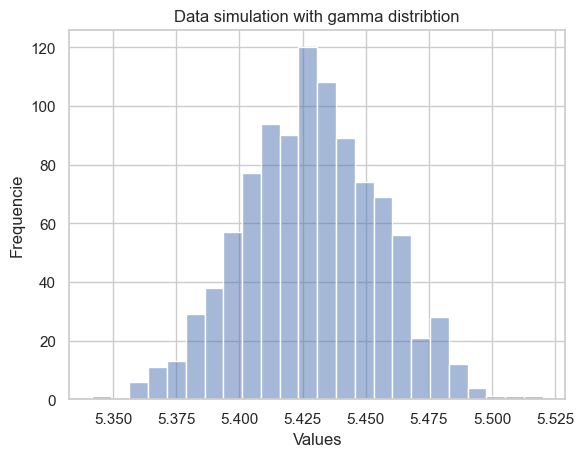

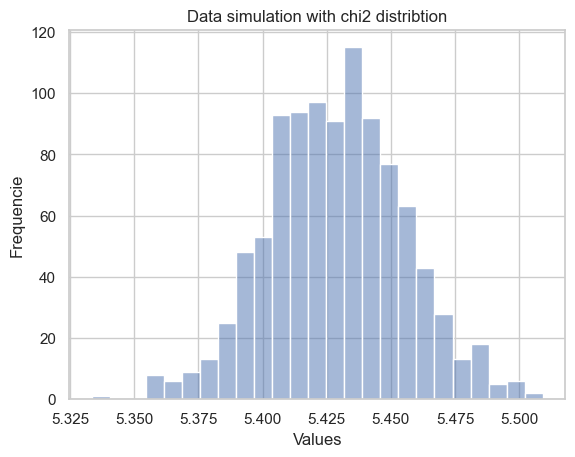

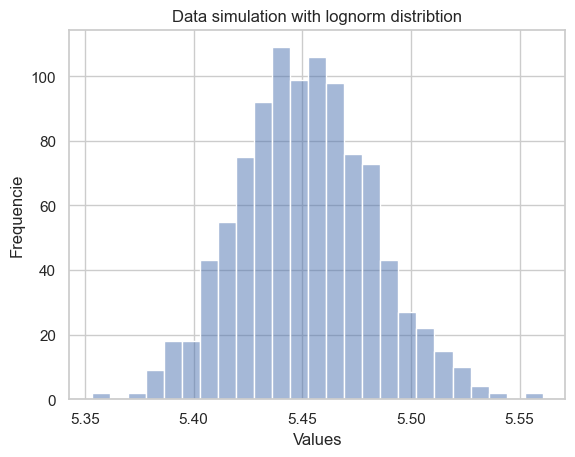

In [85]:
montecarol_simulation_univariate(data,1000,10000)

# Fitter function
    Let's take a closer look at the Fitter function and its results in relation to the analysis of the input data distribution.

In [1]:
from scipy import stats
import numpy as np
data = stats.gamma.rvs(a=2, loc=1.5, scale=2, size=10000)

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
gamma,0.000841,1309.210913,1330.841934,inf,0.006979,7.119703e-01
chi2,0.000841,1309.205670,1330.836691,inf,0.006976,7.124735e-01
lognorm,0.002614,1152.475343,1174.106365,inf,0.014863,2.387619e-02
rayleigh,0.025396,2247.140129,2261.560810,inf,0.092533,5.772149e-75
exponpow,0.037227,2782.174622,2803.805643,inf,0.076809,9.299356e-52


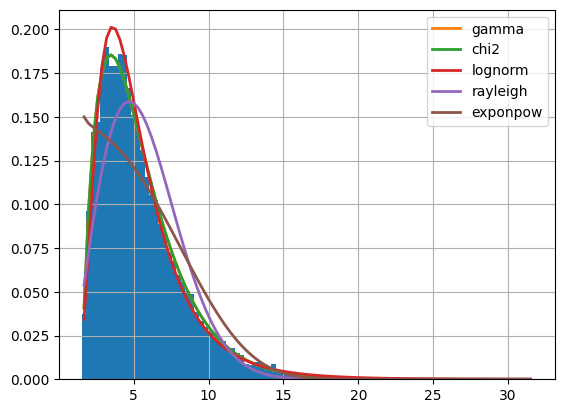

In [2]:
from fitter import Fitter, get_common_distributions
f = Fitter(data,
           distributions= get_common_distributions())
  
f.fit()

f.summary()

In [3]:
f.get_best(method = 'sumsquare_error')

{'gamma': {'a': 1.9631151641471623,
  'loc': 1.512418632569591,
  'scale': 2.0158942097433656}}